In [2]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
import pygraphviz as pgv
from pyvis.network import Network
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import requests
%matplotlib inline

In [22]:
pos_df = pd.read_csv("/homes/fabadmus/Internship/PD/target")
# pos_df = pd.read_csv("/homes/fabadmus/Internship/PDtest2/TWDIS_06685", sep='\t')
print(len(pos_df))
neg_df = pd.read_csv("/homes/fabadmus/Internship/PD/control")
# neg_df = pd.read_csv("/homes/fabadmus/Internship/PDtest2/TWDIS_09536",sep='\t' )
print(len(neg_df))

94
159


In [23]:
full_df = pd.read_csv('/homes/fabadmus/Internship/PD/model_data_path')
full_df

,Unnamed: 0,subject,object,local_mi,label
0,0,TWDIS_06685,TWMET_00170,1341760,POS
1,1,TWDIS_06685,TWMET_00012,573717,POS
2,2,TWDIS_06685,TWMET_01157,86022,POS
3,4,TWDIS_06685,TWMET_00848,11973,POS
4,7,TWDIS_06685,TWMET_00014,5049,POS
...,...,...,...,...,...
130,248,TWDIS_09536,TWMET_00245,110,NEG
131,249,TWDIS_09536,TWMET_00868,110,NEG
132,250,TWDIS_09536,TWMET_00347,109,NEG
133,251,TWDIS_09536,TWMET_00534,102,NEG


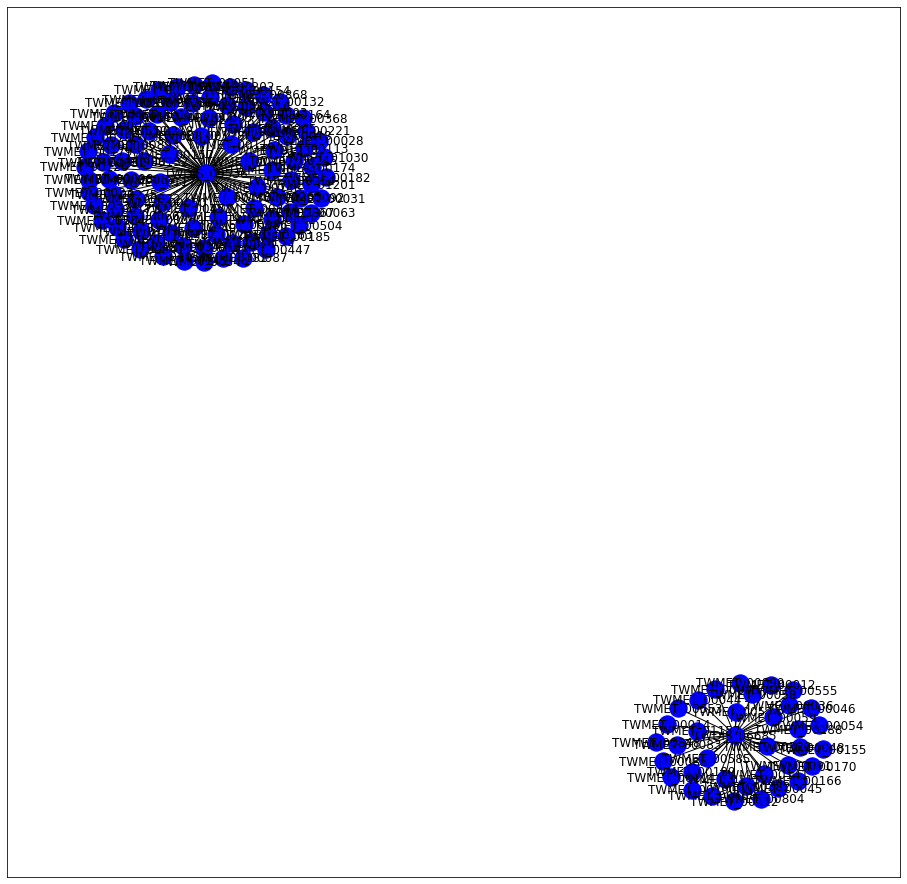

In [4]:
g = nx.from_pandas_edgelist(full_df, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')
plt.figure(5, figsize=(16, 16))
pos =nx.spring_layout(g)
nx.draw_networkx(g, node_color="blue" , pos=pos, with_labels = True)


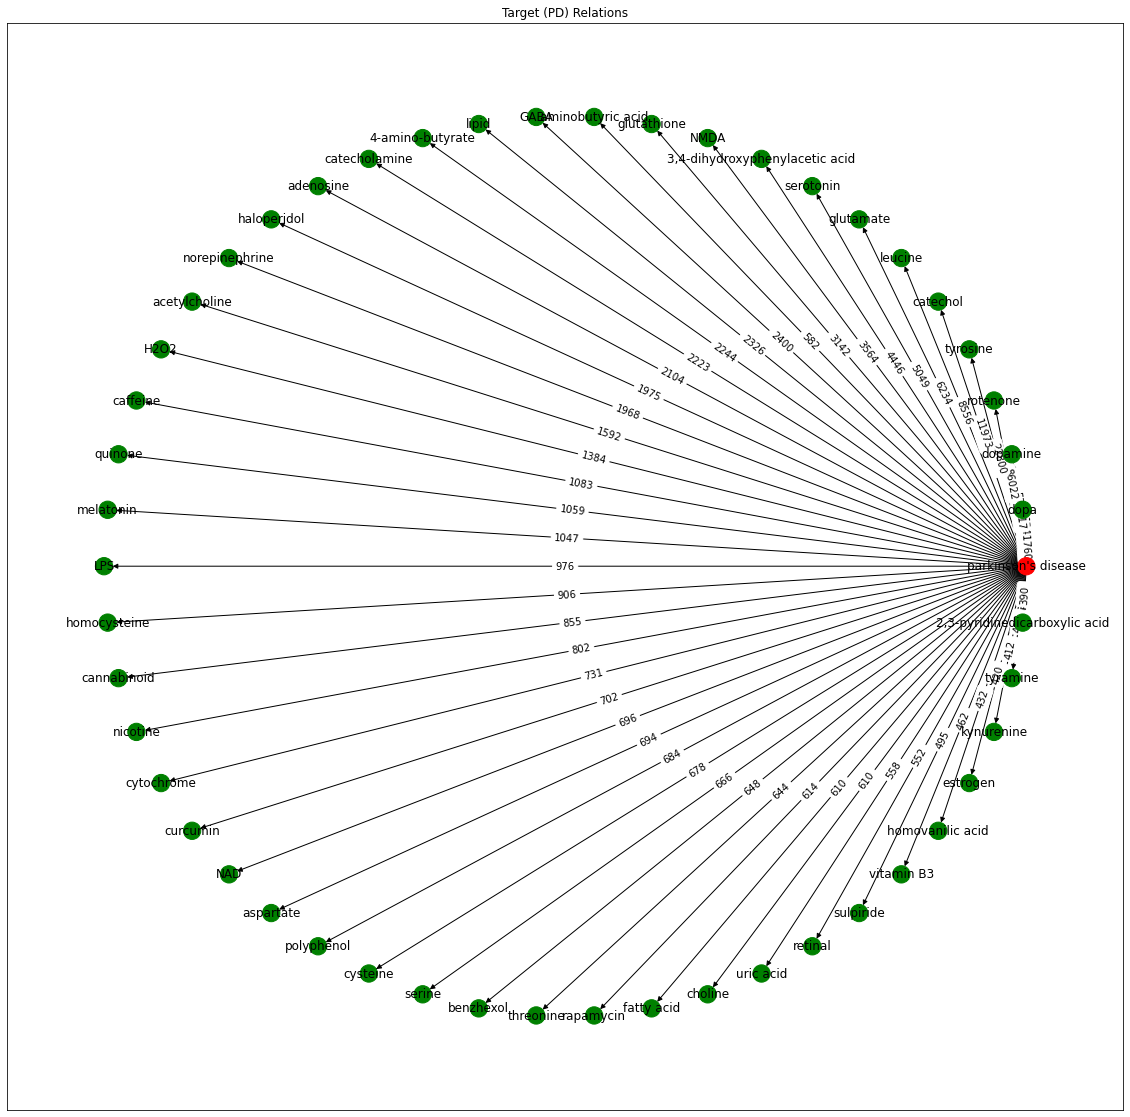

In [7]:
# convert positive parkinsons relations to graph
df_park = pd.read_csv('/homes/fabadmus/Internship/PDtest2/TWDIS_06685', sep='\t')
g = nx.from_pandas_edgelist(df_park, "subject_annotated", "object_annotated", 'local_mi',
                            create_using=nx.DiGraph)
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=200)
pos = nx.circular_layout(g)
color_map = ['red' if node.startswith("park") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, 
pos=pos, 
edge_labels=nx.get_edge_attributes(g, 'local_mi'),
font_color="black",
);
plt.title('Target (PD) Relations')
plt.show()

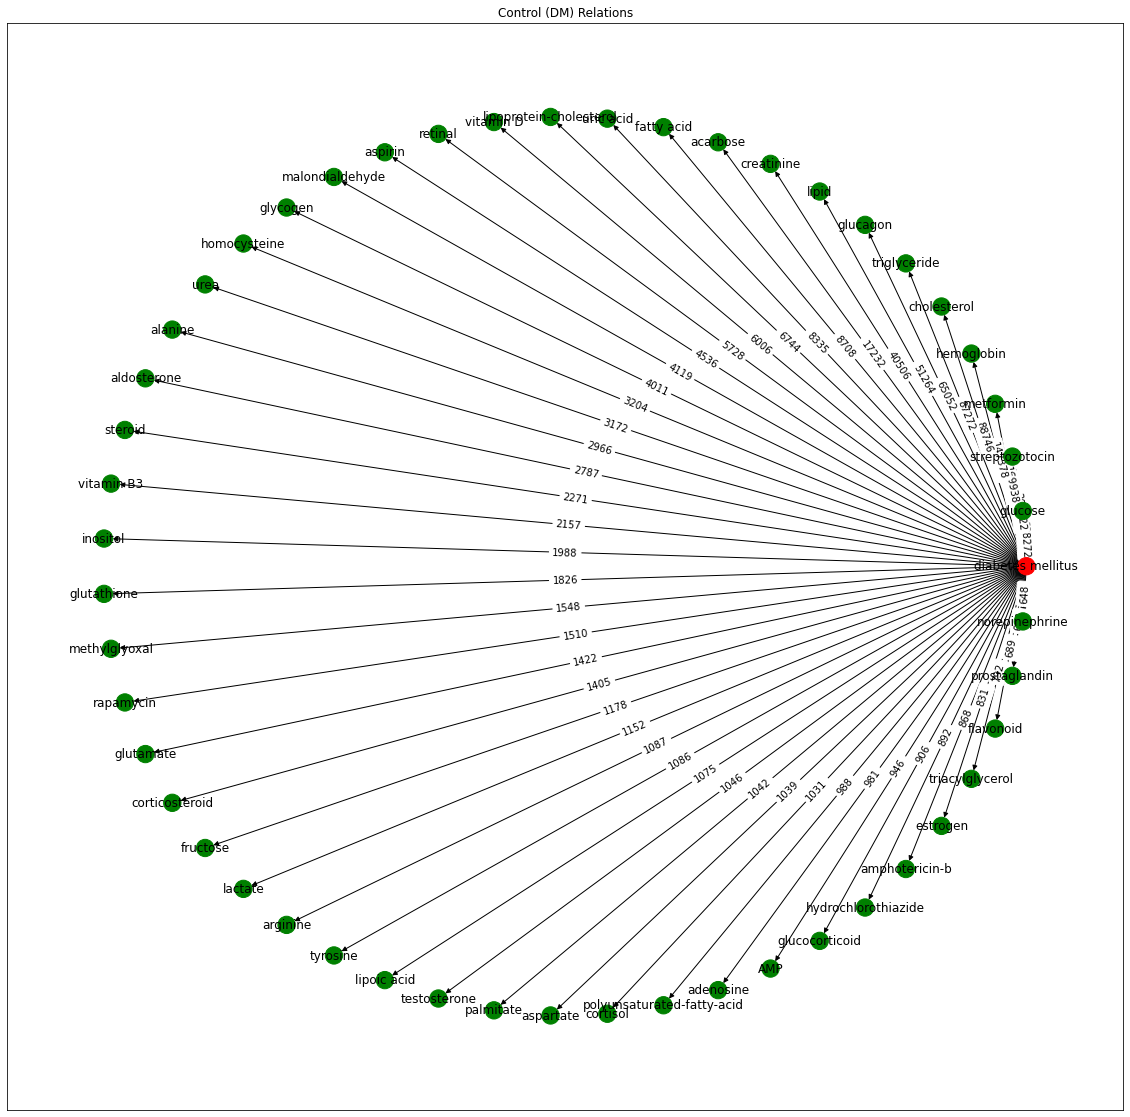

In [9]:
# convert positive parkinsons relations to graph
df_park = pd.read_csv('/homes/fabadmus/Internship/PDtest2/TWDIS_09536', sep='\t')
g = nx.from_pandas_edgelist(df_park, "subject_annotated", "object_annotated", 'local_mi',
                            create_using=nx.DiGraph)
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=200)
pos = nx.circular_layout(g)
color_map = ['red' if node.startswith("diab") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, 
pos=pos, 
edge_labels=nx.get_edge_attributes(g, 'local_mi'),
font_color="black",
);
plt.title('Control (DM) Relations')
plt.show()

In [36]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/PD/second_layer')
second_layer

,Unnamed: 0,subject,object,local_mi
0,0,TWDIS_06685,TWMET_00170,1341760
1,1,TWDIS_06685,TWMET_00012,573717
2,2,TWDIS_06685,TWMET_01157,86022
3,3,TWDIS_06685,TWMET_00848,11973
4,4,TWDIS_06685,TWMET_00014,5049
...,...,...,...,...
2508,2508,TWMET_01236,TWMET_01125,78449
2509,2509,TWMET_01237,TWMET_00708,220230
2510,2510,TWMET_01237,TWMET_00748,89712
2511,2511,TWMET_01238,TWMET_00680,4408950


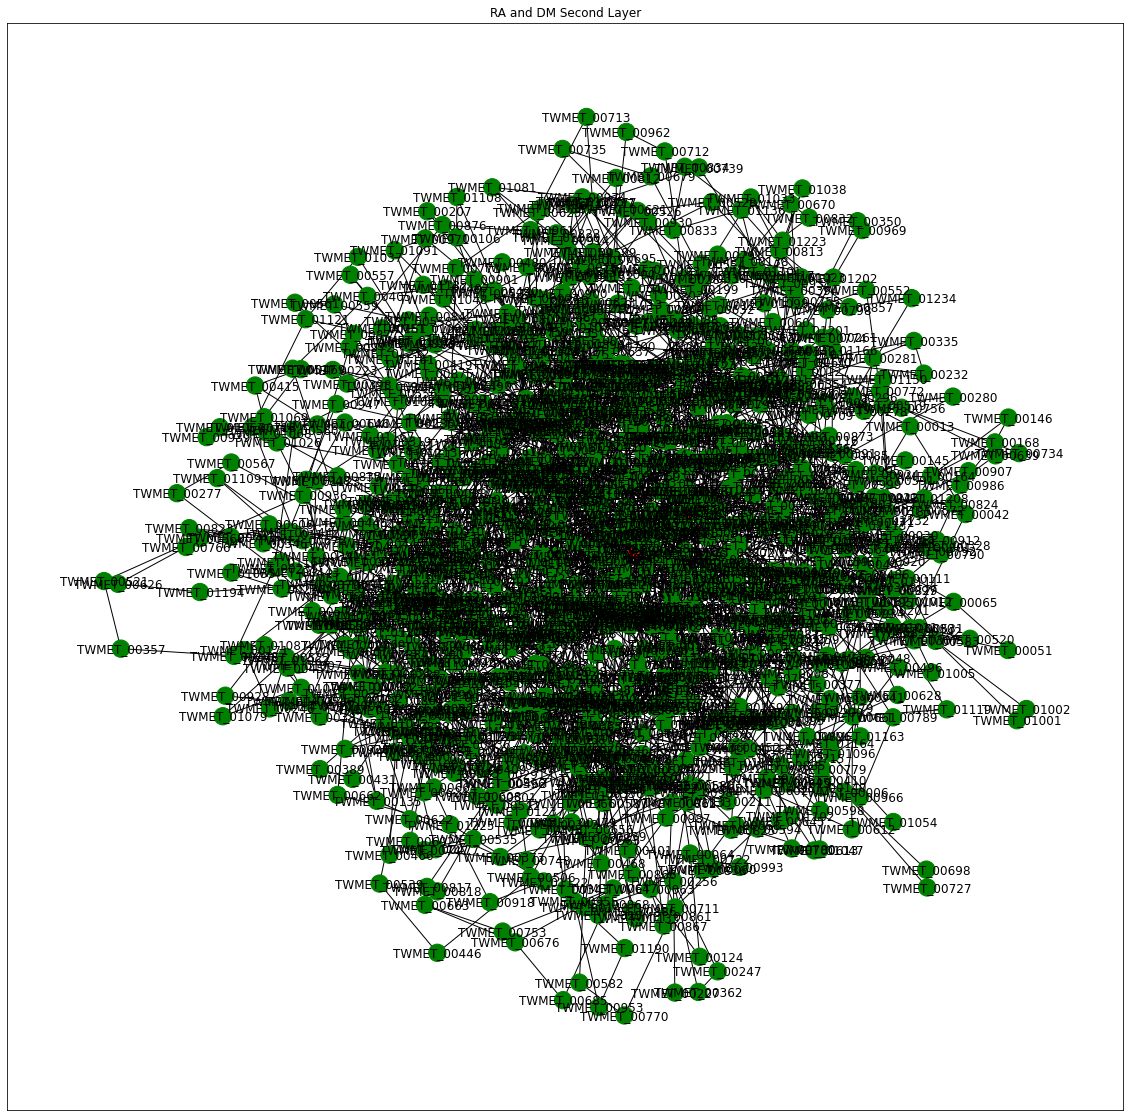

In [10]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/PD/second_layer')
g = nx.from_pandas_edgelist(full_second_layer, source='subject',
                            target='object')
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=10)

#pos = nx.nx_agraph.graphviz_layout(g, prog="twopi", args="")
# test[test == '0'] = '#C6442A'
# test[test == '1'] = '#9E2AC6'
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'local_mi'), font_color="black",
);
plt.title('RA and DM Second Layer')
plt.show()

In [25]:
# convert the second_layer into a graph
second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')

In [38]:
# # load the embeddings of the graph

# embeddings = Word2Vec.load('/homes/fabadmus/Internship/PD/embedding')

# # Convert embeddings to dataframe

# emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

#                         for n in G.nodes], index=G.nodes))

# #emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,0.90,-0.78,0.54,-2.71,-5.31,3.27,1.41,-0.12,-0.32,-2.19,-5.67,1.22,5.88,-3.46,3.34,-3.30
TWMET_00011,-0.19,-1.94,0.48,-0.04,-3.69,0.70,2.50,-2.95,0.64,1.82,-3.53,1.28,1.74,-2.82,4.52,-2.50
TWMET_00411,1.04,-0.71,-0.22,-1.23,-2.00,1.35,-0.00,-0.08,-0.78,0.35,-2.31,0.30,2.48,-1.77,1.56,-0.70
TWMET_00002,-1.69,-1.37,1.36,-0.03,-2.01,1.52,0.58,-3.72,2.26,0.94,-3.02,0.85,1.51,-2.25,4.11,-1.47
TWMET_00003,-0.52,-0.84,2.06,0.36,-2.69,2.13,1.01,-3.99,2.05,1.61,-4.38,0.62,1.64,-3.35,3.76,-3.46
TWMET_00004,-1.01,4.23,-1.43,-1.95,1.95,3.23,-4.81,1.17,0.20,0.39,-3.63,0.60,3.41,-1.94,3.89,-2.09
TWMET_00144,0.02,4.68,-4.19,-2.55,0.44,1.77,-3.10,1.03,0.08,1.47,-4.23,2.75,3.19,-0.41,3.08,-1.35
TWMET_00126,1.38,3.12,-1.69,-1.84,3.65,3.21,-3.57,2.40,0.29,2.74,-1.44,-1.57,3.99,-0.33,2.45,-1.74
TWMET_00005,-1.17,-0.34,0.97,0.17,-1.54,-1.55,0.54,-0.60,-1.91,3.07,-0.89,-1.88,-2.02,-0.59,2.54,2.40
TWMET_00026,-1.26,-1.75,0.79,0.14,-2.83,-0.51,-0.59,0.60,-2.82,4.38,-1.81,-2.85,-3.61,-2.49,2.60,2.90


In [27]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [28]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

72


In [29]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

35
100


In [31]:
# create a dataframe for the training from the labeled embeddings
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00044,-2.82,-0.88,-2.96,-1.80,-0.42,2.08,-1.65,-5.21,1.59,2.03,-1.80,1.27,2.18,-0.38,1.09,0.30,POS
TWMET_00012,1.15,-1.28,-7.02,-2.15,1.14,5.08,-1.68,1.96,-0.90,2.42,-2.84,-2.89,-0.82,-0.39,1.13,1.33,POS
TWMET_00014,-0.58,-1.19,-3.40,-2.62,0.62,4.45,-1.69,0.64,-0.61,1.28,-2.00,-0.78,-1.32,-1.46,-0.04,3.67,POS
TWMET_00083,-2.46,0.64,-2.02,2.45,2.07,-1.93,-1.13,-0.13,-0.21,3.44,-4.48,0.49,3.03,-2.14,2.82,2.77,POS
TWMET_00036,-0.21,0.21,-0.22,0.08,-0.04,-0.18,0.36,0.01,-0.22,-1.10,0.65,-0.13,0.70,0.21,0.49,0.52,POS


In [32]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00411,1.04,-0.71,-0.22,-1.23,-2.00,1.35,-0.00,-0.08,-0.78,0.35,-2.31,0.30,2.48,-1.77,1.56,-0.70,NaN
TWMET_00002,-1.69,-1.37,1.36,-0.03,-2.01,1.52,0.58,-3.72,2.26,0.94,-3.02,0.85,1.51,-2.25,4.11,-1.47,NaN
TWMET_00004,-1.01,4.23,-1.43,-1.95,1.95,3.23,-4.81,1.17,0.20,0.39,-3.63,0.60,3.41,-1.94,3.89,-2.09,NaN
TWMET_00144,0.02,4.68,-4.19,-2.55,0.44,1.77,-3.10,1.03,0.08,1.47,-4.23,2.75,3.19,-0.41,3.08,-1.35,NaN
TWMET_00026,-1.26,-1.75,0.79,0.14,-2.83,-0.51,-0.59,0.60,-2.82,4.38,-1.81,-2.85,-3.61,-2.49,2.60,2.90,NaN


In [33]:
print(len(model_df))

135


In [34]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['set']

In [35]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:28<00:00,  1.03it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.78               0.76    None      0.78   
AdaBoostClassifier                 0.78               0.70    None      0.75   
SGDClassifier                      0.76               0.69    None      0.74   
BaggingClassifier                  0.76               0.68    None      0.73   
LGBMClassifier                     0.73               0.65    None      0.69   
PassiveAggressiveClassifier        0.68               0.64    None      0.67   
GaussianNB                         0.73               0.63    None      0.68   
KNeighborsClassifier               0.73               0.63    None      0.68   
RandomForestClassifier             0.73               0.63    None      0.68   
ExtraTreeClassifier                0.66               0.60    None      0.64   
ExtraTreesClassifier               0.71 

## ADABOOST

In [17]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7804878048780488


In [18]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [65]:
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":3,"NEG":1},{"POS":1,"NEG":1}],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits

 RandomForestClassifier(class_weight={'NEG': 1, 'POS': 1}, criterion='entropy',
                       max_depth=10, max_features=0.5, min_samples_leaf=3)


In [66]:
pred1 = model1.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         NEG       0.74      0.93      0.83        28
         POS       0.67      0.31      0.42        13

    accuracy                           0.73        41
   macro avg       0.70      0.62      0.62        41
weighted avg       0.72      0.73      0.70        41



/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


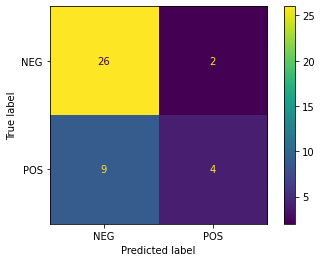

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


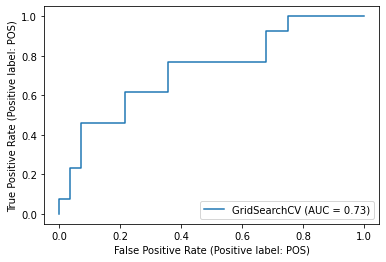

In [68]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [69]:
model2 = RandomForestClassifier()

model2.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         NEG       0.68      0.93      0.79        28
         POS       0.33      0.08      0.12        13

    accuracy                           0.66        41
   macro avg       0.51      0.50      0.46        41
weighted avg       0.57      0.66      0.58        41



/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


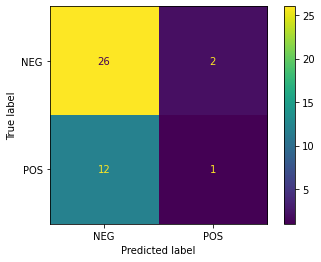

In [71]:
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


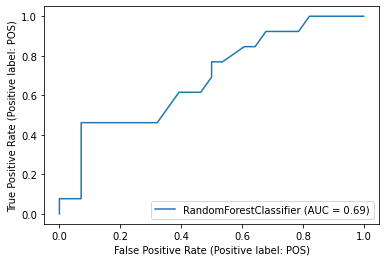

In [72]:
metrics.plot_roc_curve(model2, X_test, y_test)

In [73]:
# make predictions on the unknown
X_val = validation_df.iloc[:,:-1]

pred = model1.predict(X_val)

In [74]:
val_proba = model1.predict_proba(X_val)

In [75]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_01184,0.104540,0.895460,POS
TWMET_00300,0.303349,0.696651,POS
TWMET_00545,0.319963,0.680037,POS
TWMET_00224,0.332599,0.667401,POS
TWMET_01117,0.365693,0.634307,POS
...,...,...,...
TWMET_01143,0.969000,0.031000,NEG
TWMET_00931,0.973690,0.026310,NEG
TWMET_00268,0.973833,0.026167,NEG
TWMET_00560,0.978143,0.021857,NEG


In [78]:
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_01184,0.104540,0.895460,POS,sulpiride
TWMET_00300,0.303349,0.696651,POS,2-oxoisocaproate
TWMET_00545,0.319963,0.680037,POS,teichoic acid
TWMET_00224,0.332599,0.667401,POS,chlorpheniramine
TWMET_01117,0.365693,0.634307,POS,p-cresol
TWMET_00524,0.371630,0.628370,POS,ribitol
TWMET_00899,0.372750,0.627250,POS,dimethyl trisulfide
TWMET_00754,0.379036,0.620964,POS,4-methylcatechol
TWMET_00294,0.379444,0.620556,POS,2-oxo-3-methylvalerate
TWMET_00043,0.387229,0.612771,POS,lysine
